In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/milknew[152].csv'
data = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDataset Statistics:")
print(data.describe())

First 5 rows of the dataset:
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
mem

In [13]:
label_encoder = LabelEncoder()
data['Grade'] = label_encoder.fit_transform(data['Grade'])
print("\nEncoded Grades:")
print(data['Grade'].unique())


Encoded Grades:
[0 1 2]


In [14]:
X = data.drop('Grade', axis=1)
y = data['Grade']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [16]:
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    results.append({"Model": name, "Accuracy": accuracy})



Training Logistic Regression...
Accuracy of Logistic Regression: 0.84
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.86      0.88      0.87        78
           2       0.93      0.83      0.88        86

    accuracy                           0.84       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.85      0.84      0.84       212


Training Random Forest...
Accuracy of Random Forest: 1.00
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212


Training SVM...
Accuracy of SVM: 0.93
              precision    recall  f1-score   support

           0  


Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.839623
1        Random Forest  0.995283
2                  SVM  0.929245
3        Decision Tree  0.990566
4  K-Nearest Neighbors  0.976415


<ipython-input-17-cebf29f5bbc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


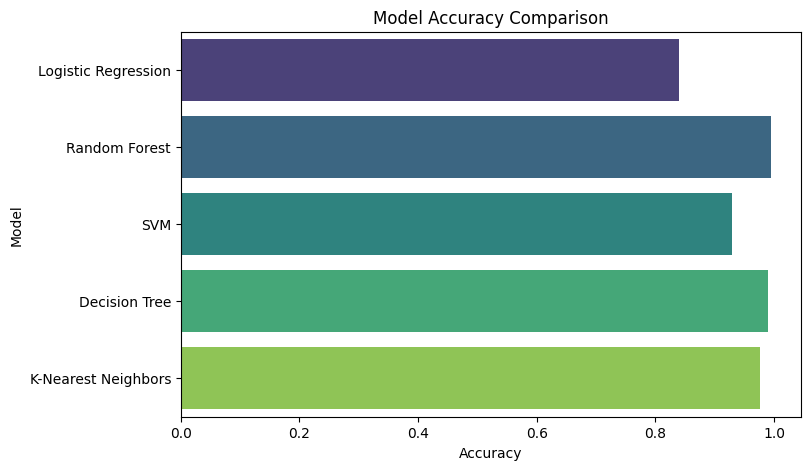

In [17]:
results_df = pd.DataFrame(results)
print("\nModel Accuracy Comparison:")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()